## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

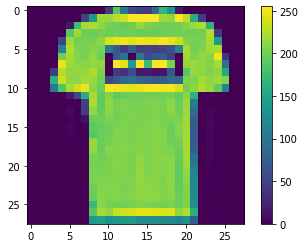

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Notes:
 ### Keras always takes value between 0 - 1

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

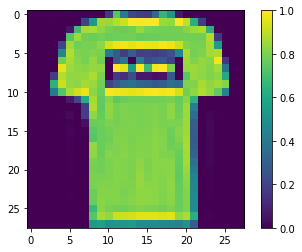

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Notes:
### Flatten layer just convert 28* 28 image size into 1D so that we can fit to the next layer

### Last denser should be equal to no of category 

In [38]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function - It will measure how accurate the model is durring training and testing. Loss function  minimize overall error during training and Once error is minimized during the training then testing error is also get minimized but it's not happened always because sometime model gets overfit.


- Optimizer
- Metrics

In [40]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs = 10,batch_size=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4805 - accuracy: 0.8279
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3665 - accuracy: 0.8676
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3325 - accuracy: 0.8787
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3093 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2948 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2799 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2706 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2589 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2507 - accuracy: 0.9060
Epoch

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
print(test_acc)

0.8739


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict_classes(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8739

In [29]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
pred = model.predict(X_test)

In [31]:
pred

array([[7.5135671e-07, 1.9499455e-10, 4.9311608e-09, ..., 3.1963559e-03,
        1.6526736e-06, 9.9654019e-01],
       [4.2999192e-05, 2.2632002e-13, 9.9351764e-01, ..., 2.3049979e-15,
        1.8774791e-06, 3.0775220e-12],
       [9.4720733e-08, 9.9999988e-01, 1.2563856e-11, ..., 3.8141575e-27,
        2.1895741e-14, 9.6021227e-18],
       ...,
       [7.2274574e-06, 6.2559636e-12, 1.9635813e-07, ..., 4.1065189e-12,
        9.9993074e-01, 3.5709489e-13],
       [1.1329722e-06, 9.9997342e-01, 2.2418638e-09, ..., 7.4945211e-14,
        4.8375309e-08, 2.6465424e-10],
       [1.9728625e-06, 2.5068508e-10, 9.9521984e-08, ..., 2.1198289e-04,
        1.7325563e-04, 1.7646702e-06]], dtype=float32)

In [32]:
pred[0]

array([7.5135671e-07, 1.9499455e-10, 4.9311608e-09, 7.0225555e-11,
       3.2058939e-08, 2.6077635e-04, 2.7258156e-07, 3.1963559e-03,
       1.6526736e-06, 9.9654019e-01], dtype=float32)

In [33]:
np.argmax(pred[0])

9

In [34]:
np.argmax(pred[1])

2

## Plotting Learning curve and confusion matrix in Tensor flow 2.0

In [37]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [42]:
model.history.history

{'loss': [0.48050301494907277,
  0.3665173670980924,
  0.332513434903929,
  0.30932234829321775,
  0.2947598132016137,
  0.27990833929921305,
  0.27061935669797094,
  0.2589296932212213,
  0.25067085279217827,
  0.24329158343309368],
 'accuracy': [0.8279333,
  0.86758333,
  0.87866664,
  0.8859,
  0.8911167,
  0.8968667,
  0.89883333,
  0.9040667,
  0.90601665,
  0.9083833]}

In [43]:
history.history

{'loss': [0.48050301494907277,
  0.3665173670980924,
  0.332513434903929,
  0.30932234829321775,
  0.2947598132016137,
  0.27990833929921305,
  0.27061935669797094,
  0.2589296932212213,
  0.25067085279217827,
  0.24329158343309368],
 'accuracy': [0.8279333,
  0.86758333,
  0.87866664,
  0.8859,
  0.8911167,
  0.8968667,
  0.89883333,
  0.9040667,
  0.90601665,
  0.9083833]}

In [44]:
import matplotlib.pyplot as plt

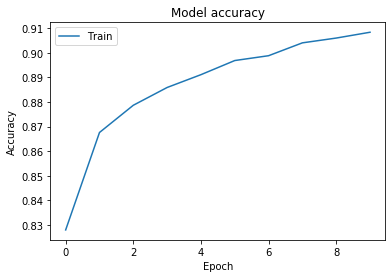

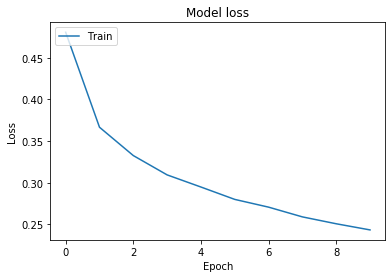

In [46]:
#Plot training & validaiton accuracy values
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()
#Plot training & validation loss values
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()


In [47]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [48]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Out of training data 20% of data will use for validation set

In [49]:
history = model.fit(X_train, y_train, epochs = 10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 134us/sample - loss: 0.4943 - accuracy: 0.8246 - val_loss: 0.4452 - val_accuracy: 0.8382
Epoch 2/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.3733 - accuracy: 0.8634 - val_loss: 0.4010 - val_accuracy: 0.8597
Epoch 3/10
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3384 - accuracy: 0.8758 - val_loss: 0.3670 - val_accuracy: 0.8641
Epoch 4/10
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3140 - accuracy: 0.8828 - val_loss: 0.3458 - val_accuracy: 0.8751
Epoch 5/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.2952 - accuracy: 0.8911 - val_loss: 0.3321 - val_accuracy: 0.8852
Epoch 6/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.2822 - accuracy: 0.8951 - val_loss: 0.3487 - val_accuracy: 0.8762
Epoch 7/10
48000/48000 [==========================

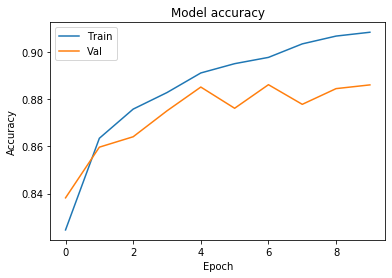

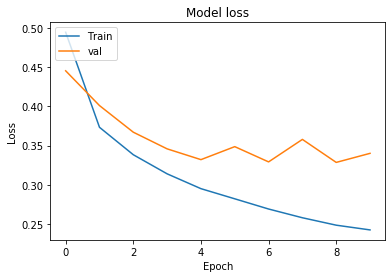

In [64]:
#Plot training & validaiton accuracy values
plt.plot(history.history["accuracy"])
plt.plot([0.83816665,
 0.85966665,
 0.86408335,
 0.8750833,
 0.88516665,
 0.87616664,
 0.8861667,
 0.8778333,
 0.8845,
 0.8860833])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Val"],loc="upper left")
plt.show()
#Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot([0.44520781699723255,
 0.4009561661747284,
 0.3670477496429036,
 0.34583599934024584,
 0.3321126639135764,
 0.34865848553114726,
 0.3292401460564967,
 0.3578704966234606,
 0.32859231628933533,
 0.34012528715077983])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","val"],loc="upper left")
plt.show()



In [62]:
model.history.history["val_loss"]

[0.44520781699723255,
 0.4009561661747284,
 0.3670477496429036,
 0.34583599934024584,
 0.3321126639135764,
 0.34865848553114726,
 0.3292401460564967,
 0.3578704966234606,
 0.32859231628933533,
 0.34012528715077983]

In [65]:
y_pred = model.predict_classes(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.8751

In [67]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [68]:
pred = model.predict(X_test)

In [69]:
pred

array([[9.79936482e-15, 1.26626555e-15, 6.59425907e-15, ...,
        6.49316050e-03, 1.73087814e-12, 9.93258834e-01],
       [4.87870275e-05, 1.06953576e-13, 9.97825265e-01, ...,
        1.52789708e-26, 3.78404312e-14, 2.63365311e-18],
       [1.60420857e-13, 1.00000000e+00, 7.18495105e-15, ...,
        6.11258338e-28, 2.18068869e-14, 8.50679119e-31],
       ...,
       [2.57747706e-06, 3.82524791e-16, 1.27358931e-07, ...,
        1.45600008e-11, 9.99994755e-01, 4.75903410e-17],
       [2.35149972e-11, 9.99998331e-01, 6.59514526e-11, ...,
        1.04588803e-16, 4.48459872e-07, 2.25998062e-21],
       [6.79691112e-08, 9.31523192e-10, 3.42750681e-08, ...,
        1.06677981e-04, 8.55673134e-05, 3.06938409e-06]], dtype=float32)

## Plot confusion matrix

In [70]:
from mlxtend.plotting import plot_confusion_matrix

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
mat = confusion_matrix(y_test,y_pred)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16242f470>)

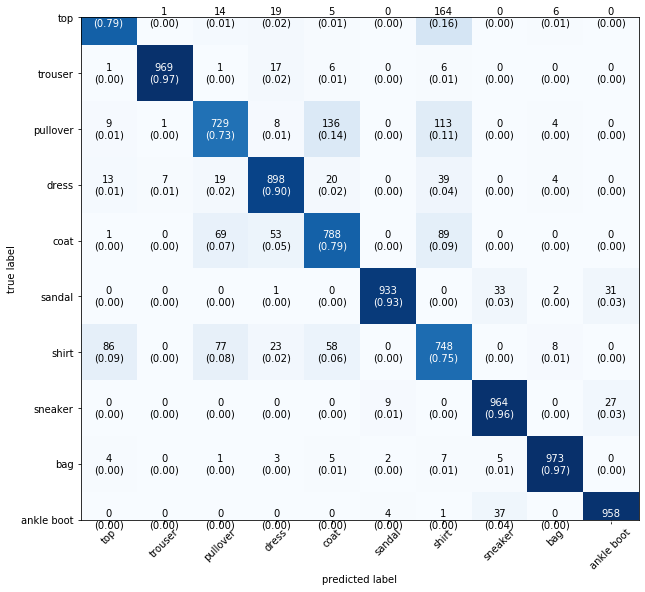

In [76]:
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=class_names,show_normed=True)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16334e470>)

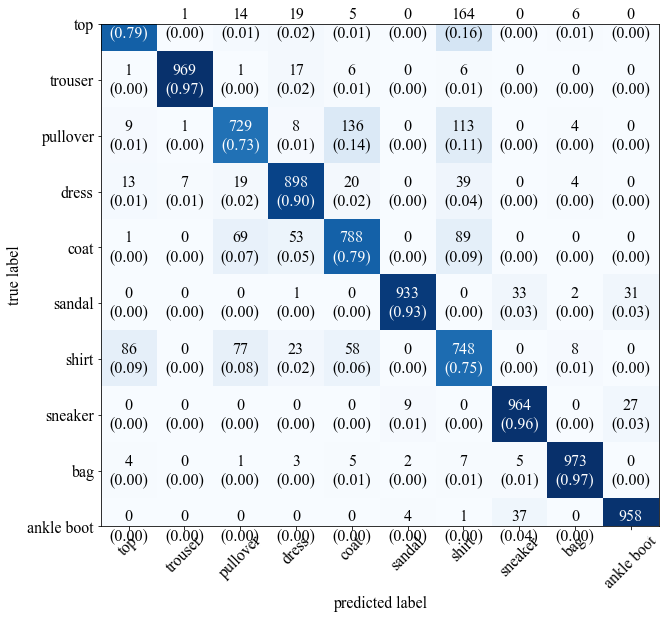

In [77]:
import matplotlib 
font = {
    "family":"Times New Roman",
    "weight":"bold",
    "size":16
}
matplotlib.rc("font",**font)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=class_names,show_normed=True)